In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

### Spoilers on how to read sql data from python with pandas.

In [3]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "bitcoinhistoricaldata"


conn_str = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"
df = pd.read_sql_query("SELECT * FROM coinbase", con=conn_str)

<IPython.core.display.Javascript object>

Skewness can be inspected by using `scipy.stats.describe()` to output a single numeric representation of skew.

* A skew of zero indicates the data is symmetric.
* A below 0 is referred to as negative skew or left skew.
* A above 0 is referred to as positive skew or left skew.
    * This comes up fairly often. An example might be annual income, a good bit of people are making an income that's relatively close to the median; however, there are some extreme cases with people making a lot a lot of money.

In [4]:
stats.describe(df["volume_btc"])

DescribeResult(nobs=65499, minmax=(1e-06, 1563.27), mean=4.43248281763691, variance=224.28468775213497, skewness=27.433690072910537, kurtosis=2004.9014649281896)

<IPython.core.display.Javascript object>

We can also inpsect skew by viewing a plot of a distribution.

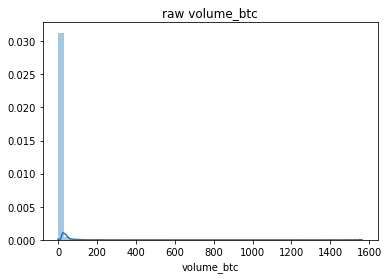

<IPython.core.display.Javascript object>

In [5]:
sns.distplot(df["volume_btc"])
plt.title("raw volume_btc")
plt.show()

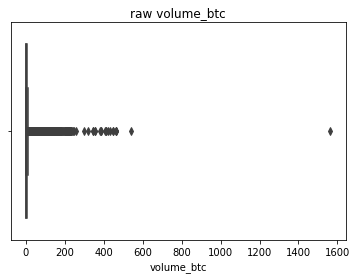

<IPython.core.display.Javascript object>

In [6]:
sns.boxplot(df["volume_btc"])
plt.title("raw volume_btc")
plt.show()

In practice, extreme skew can get in the way and we typically like to avoid working with skewed data.  One way to alleviate skewed data is with a transformation.  We apply a function to the data so that we de-skew, but so that we don't lose any information in the data.

### `log` transform

A `log` (or logarithm) is the opposite of raising a number to an exponent.  A log answers the question, "what number do I need to raise the base to to get this result?"  (more below to make sense of this sentence).


* Some exponential expressions:
    * $10^1 = 10$
        * 10 raised to the 1 is 10
    * $10^2 = 100$
    * $10^3 = 1000$
* Some related logarithmic expressions:
    * $log_{10}(10) = 1$
        * What number do I need to raise 10 to to get 10?
    * $log_{10}(100) = 2$
        * What number do I need to raise 10 to to get 100?
    * $log_{10}(1000) = 3$
    
In all of the above math, the number $10$ is referred to as the 'base'.  We can use whatever base we'd like though:

* $2^2 = 4$
* $log_2(4) = 2$


* $3^2 = 9$
* $log_3(9) = 2$

A common base to use is the number $e$; this is so common that $log_e(2)$ is referred to as taking the 'natural log' of 2.  Want to know more about $e$?  [Here is a great video](https://youtu.be/pg827uDPFqA) discussing the origins of the mysterious number $e$.

Here is what a log transform (base 10) does to our skewed distribution.  Think through why this makes sense.  Let's say we have some skewed data and we apply $log_{10}()$ to it: 

* Input (`x`)
    * `[1, 1, 1, 1, 1, 1, 10, 100, 1000, 10000]`
* Output (`log10(x)`)
    * `[0, 0, 0, 0, 0, 0, 1, 2, 3, 4]`
    
All of the observations in our data are still in the same order, but now they're way closer together.  Being in the same order is important because it means any correlations with other variables should remain intact.  Being close together is important because this often allows our mathematical tools to work better.

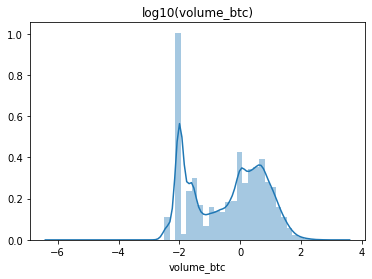

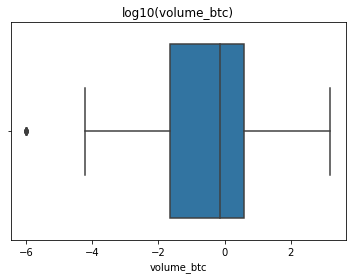

<IPython.core.display.Javascript object>

In [7]:
log_transformed = np.log10(df["volume_btc"])

sns.distplot(log_transformed)
plt.title("log10(volume_btc)")
plt.show()

sns.boxplot(log_transformed)
plt.title("log10(volume_btc)")
plt.show()

Other potential transforms are to take the square root or cube root.  I'd say that overall, log is more often used tool for handling skewed data.

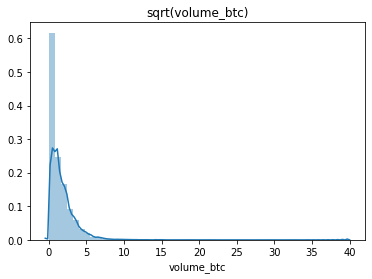

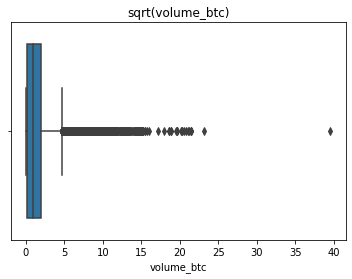

<IPython.core.display.Javascript object>

In [8]:
sq_root_transformed = np.sqrt(df["volume_btc"])

sns.distplot(sq_root_transformed)
plt.title("sqrt(volume_btc)")
plt.show()

sns.boxplot(sq_root_transformed)
plt.title("sqrt(volume_btc)")
plt.show()

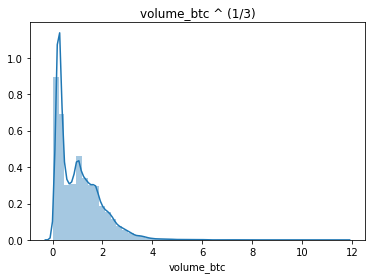

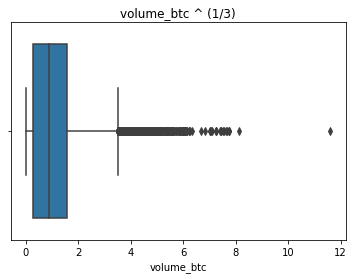

<IPython.core.display.Javascript object>

In [9]:
cube_root_transformed = df["volume_btc"] ** (1 / 3)

sns.distplot(cube_root_transformed)
plt.title("volume_btc ^ (1/3)")
plt.show()

sns.boxplot(cube_root_transformed)
plt.title("volume_btc ^ (1/3)")
plt.show()